# Handling and Parsing Dates

Inspired by https://www.kaggle.com/rtatman/data-cleaning-challenge-parsing-dates

- [Convert string date columns to datetime objects](#Convert-string-date-columns-to-datetime-objects)
- [Strptime examples](#strptime)

In [1]:
#set up environment
import pandas as pd
import numpy as np
import seaborn as sns

import datetime

### Data
https://www.kaggle.com/nasa/landslide-events

We will be using a dataset of Landslides after rain 

which has the location and cause of landslide around the world

In [2]:
landslides = pd.read_csv("./data/day_3/catalog.csv")
landslides.head(3)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...


### Check the datatype of the date column
we will be looking at the `date` column from the `landslide` dataframe

In [3]:
print(landslides["date"].head(3))

first_date = landslides["date"][0]
print(first_date, type(first_date))
print(landslides["date"].dtype)

0     3/2/07
1    3/22/07
2     4/6/07
Name: date, dtype: object
3/2/07 <class 'str'>
object


### Convert date columns to datetime

Formatting: http://strftime.org/

Code|Meaning|Example
-|-|-
%a|Weekday as locales abbreviated name.|Mon
%A|Weekday as locales full name.|Monday
%w|Weekday as a decimal number, where 0 is Sunday and 6 is Saturday.|1
%d|Day of the month as a zero-padded decimal number.|30
%-d|Day of the month as a decimal number. (Platform specific)|30
%b|Month as locales abbreviated name.|Sep
%B|Month as locales full name.|September
%m|Month as a zero-padded decimal number.|09
%-m|Month as a decimal number. (Platform specific)|9
%y|Year without century as a zero-padded decimal number.|13
%Y|Year with century as a decimal number.|2013
%H|Hour (24-hour clock) as a zero-padded decimal number.|07
%-H|Hour (24-hour clock) as a decimal number. (Platform specific)|7
%I|Hour (12-hour clock) as a zero-padded decimal number.|07
%-I|Hour (12-hour clock) as a decimal number. (Platform specific)|7
%p|Locales equivalent of either AM or PM.|AM
%M|Minute as a zero-padded decimal number.|06
%-M|Minute as a decimal number. (Platform specific)|6
%S|Second as a zero-padded decimal number.|05
%-S|Second as a decimal number. (Platform specific)|5
%f|Microsecond as a decimal number, zero-padded on the left.|000000
%z|UTC offset in the form +HHMM or -HHMM (empty string if the the object is naive).|
%Z|Time zone name (empty string if the object is naive).|
%j|Day of the year as a zero-padded decimal number.|273
%-j|Day of the year as a decimal number. (Platform specific)|273
%U|Week number of the year (Sunday as the first day of the week) as a zero padded decimal number. All days in a new year preceding the first Sunday are considered to be in week 0.|39
%W|Week number of the year (Monday as the first day of the week) as a decimal number. All days in a new year preceding the first Monday are considered to be in week 0.|39
%c|Locales appropriate date and time representation.|Mon Sep 30 07:06:05 2013
%x|Locales appropriate date representation.|09/30/13
%X|Locales appropriate time representation.|07:06:05
%%|A literal '%' character.|%

# Convert string date columns to datetime objects

In [4]:
landslides.head(3)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...


`pandas.to_datetime`

In [5]:
date_parsed = pd.to_datetime(landslides["date"], format="%m/%d/%y")
date_parsed.head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date, dtype: datetime64[ns]

In [6]:
df = pd.DataFrame()
df["original"] = landslides["date"]
df["date_parsed"] = pd.to_datetime(df["original"], format="%m/%d/%y")

df["year"] = date_parsed.dt.year
df["month"] = date_parsed.dt.month
df["day of month"] = date_parsed.dt.day
df["day of week"] = date_parsed.dt.weekday
df["weekday"] = date_parsed.dt.weekday.map({
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday"
})

df.head()

,original,date_parsed,year,month,day of month,day of week,weekday
0,3/2/07,2007-03-02,2007.0,3.0,2.0,4.0,Friday
1,3/22/07,2007-03-22,2007.0,3.0,22.0,3.0,Thursday
2,4/6/07,2007-04-06,2007.0,4.0,6.0,4.0,Friday
3,4/14/07,2007-04-14,2007.0,4.0,14.0,5.0,Saturday
4,4/15/07,2007-04-15,2007.0,4.0,15.0,6.0,Sunday


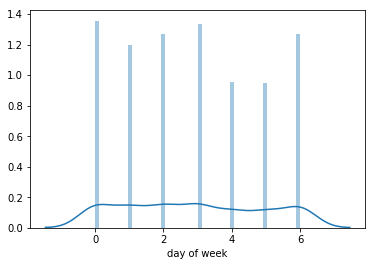

In [7]:
df.dropna(inplace=True)
sns.distplot(df["day of week"], bins=50)

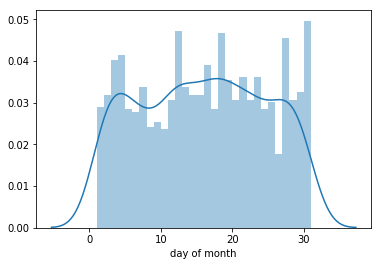

In [8]:
sns.distplot(df["day of month"], bins=30)

# Another dataset

https://www.kaggle.com/usgs/earthquake-database

Significant Earthquakes, 1965-2016
Date, time, and location of all earthquakes with magnitude of 5.5 or higher

In [9]:
earthquake = pd.read_csv("./data/day_3/database.csv")
earthquake.head(3)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic


In [10]:
earthquake.Type.unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [11]:
df = earthquake[["Date", "Time", "Type", "Magnitude"]]
df.head()

,Date,Time,Type,Magnitude
0,01/02/1965,13:44:18,Earthquake,6.0
1,01/04/1965,11:29:49,Earthquake,5.8
2,01/05/1965,18:05:58,Earthquake,6.2
3,01/08/1965,18:49:43,Earthquake,5.8
4,01/09/1965,13:32:50,Earthquake,5.8


 Clean data

In [12]:
df[df["Date"].apply(len)>10]

,Date,Time,Type,Magnitude
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,Earthquake,5.6
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,Earthquake,5.6
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,Earthquake,5.8


# strptime
### Parsing time using `datetime.datetime.strptime(string, format)`: string parse time

Converts string to datetime object

In [41]:
datetime.datetime.strptime("1975-02-23", "%Y-%m-%d")

datetime.datetime(1975, 2, 23, 0, 0)

In [25]:
nofrag, frag = "1985-04-28T02:53:41.530Z".split(".")
nofrag = datetime.datetime.strptime(nofrag, "%Y-%m-%dT%H:%M:%S")
print("nofrag: ", nofrag)
print("frag: ", frag)

nofrag:  1985-04-28 02:53:41
frag:  530Z


In [26]:
frag = frag.replace("Z", "")
frag

'530'

In [27]:
nofrag.microsecond

0

In [28]:
nofrag.replace(microsecond=int(frag))

datetime.datetime(1985, 4, 28, 2, 53, 41, 530)

In [40]:
def convert_time(df):
    if len(df["Date"])==10:
        dt = df["Date"] + df["Time"]
        return datetime.datetime.strptime(dt, "%m/%d/%Y%H:%M:%S")
    else:
        # 3 edge cases
        print(df["Date"], len(df["Date"]))
        nofrag, frag = df["Date"].split(".")
        nofrag = datetime.datetime.strptime(nofrag, "%Y-%m-%dT%H:%M:%S")     
        frag = frag.replace("Z", "")
        nofrag.replace(microsecond=int(frag))
        return nofrag        
        
df["datetime"] = df.apply(convert_time, axis=1) # rowwise

1975-02-23T02:58:41.000Z 24
1985-04-28T02:53:41.530Z 24
2011-03-13T02:23:34.520Z 24


c:\users\adam.ilyas\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df.head(3)

,Date,Time,Type,Magnitude,datetime
0,01/02/1965,13:44:18,Earthquake,6.0,1965-01-02 13:44:18
1,01/04/1965,11:29:49,Earthquake,5.8,1965-01-04 11:29:49
2,01/05/1965,18:05:58,Earthquake,6.2,1965-01-05 18:05:58
